# Import Libraries

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from fbprophet import Prophet

# Obtain Data

Read AirQualityUCI.csv into pandas and isolate PT08.S3(NOx) column for time series

In [146]:
df = pd.read_csv('AirQualityUCI.csv', delimiter=';')
df['Period'] = df['Date'] + ' ' + df['Time']
df = df[['Period','PT08.S3(NOx)']]
df.rename(columns={'PT08.S3(NOx)':'NOx'}, inplace=True)
df.head()

,Period,NOx
0,10/03/2004 18.00.00,1056.0
1,10/03/2004 19.00.00,1174.0
2,10/03/2004 20.00.00,1140.0
3,10/03/2004 21.00.00,1092.0
4,10/03/2004 22.00.00,1205.0


Convert Period column to DateTime format

In [147]:
def replace_periods(date_time):
    return str(date_time).replace('.',':')
df['Period'] = df['Period'].apply(replace_periods)
df['Period'] = pd.to_datetime(df['Period'])
df.head()

,Period,NOx
0,2004-10-03 18:00:00,1056.0
1,2004-10-03 19:00:00,1174.0
2,2004-10-03 20:00:00,1140.0
3,2004-10-03 21:00:00,1092.0
4,2004-10-03 22:00:00,1205.0


# Scrub Data

In [151]:
df.drop(labels=range(9357,9471), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Period  9357 non-null   datetime64[ns]
 1   NOx     9357 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 219.3 KB


[Text(0, 0, '2004-10-03T18:00:00.000000000'),
 Text(0, 0, '2004-10-03T19:00:00.000000000'),
 Text(0, 0, '2004-10-03T20:00:00.000000000'),
 Text(0, 0, '2004-10-03T21:00:00.000000000'),
 Text(0, 0, '2004-10-03T22:00:00.000000000'),
 Text(0, 0, '2004-10-03T23:00:00.000000000'),
 Text(0, 0, '2004-11-03T00:00:00.000000000'),
 Text(0, 0, '2004-11-03T01:00:00.000000000'),
 Text(0, 0, '2004-11-03T02:00:00.000000000'),
 Text(0, 0, '2004-11-03T03:00:00.000000000')]

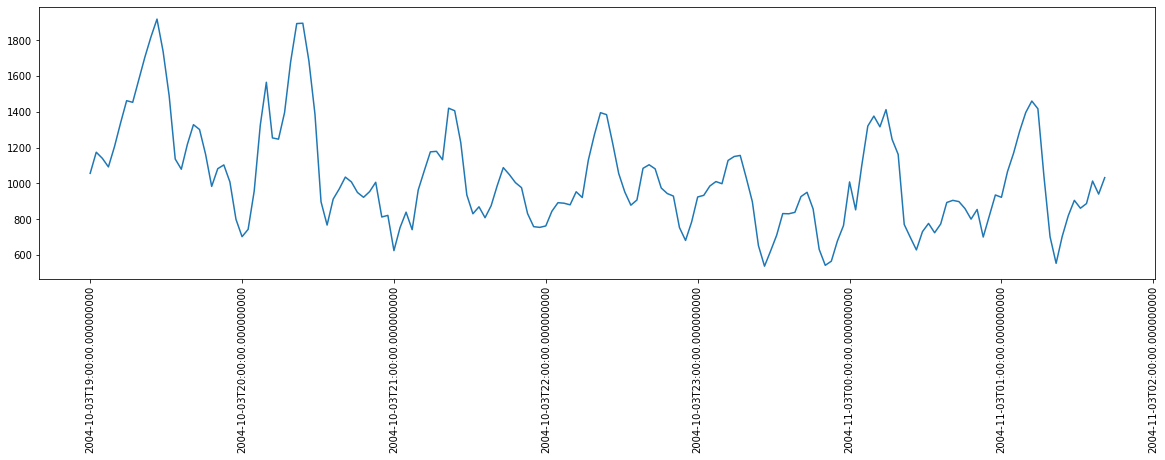

In [165]:
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(range(0,168),df['NOx'].values[0:168])
ax.set_xticklabels(df['Period'].values[0:168], rotation=90)

[Text(0, 0, '2004-10-03T18:00:00.000000000'),
 Text(0, 0, '2004-10-03T19:00:00.000000000'),
 Text(0, 0, '2004-10-03T20:00:00.000000000'),
 Text(0, 0, '2004-10-03T21:00:00.000000000'),
 Text(0, 0, '2004-10-03T22:00:00.000000000'),
 Text(0, 0, '2004-10-03T23:00:00.000000000'),
 Text(0, 0, '2004-11-03T00:00:00.000000000')]

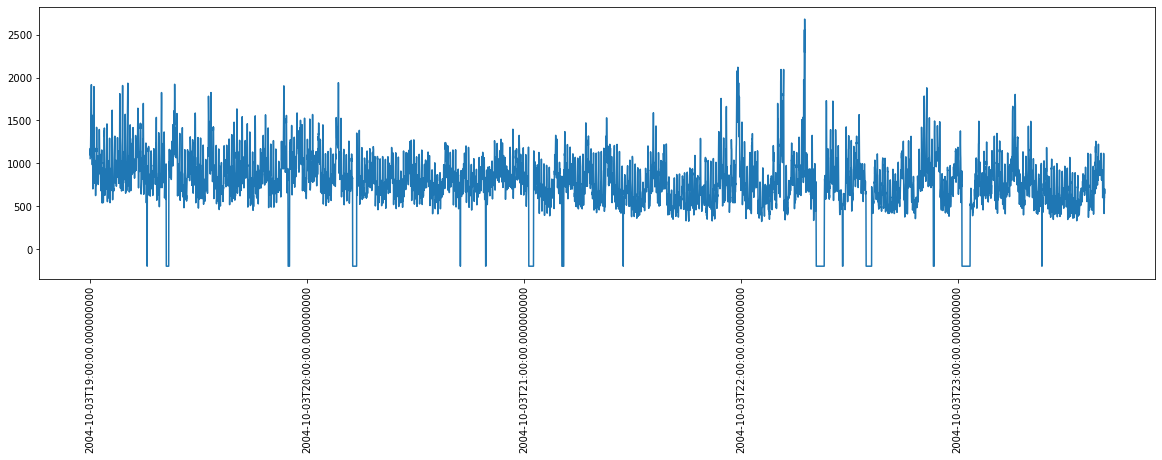

In [164]:
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(range(0,9357),df['NOx'].values)
ax.set_xticklabels(df['Period'].values, rotation=90)

In [139]:
adfuller(df['NOx'])

(-10.709339924536506,
 3.363197093089726e-19,
 38,
 9318,
 {'1%': -3.431051985659412,
  '5%': -2.8618502334031457,
  '10%': -2.5669351321592124},
 113706.88708216322)

# Explore Data

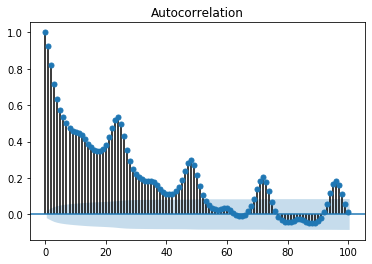

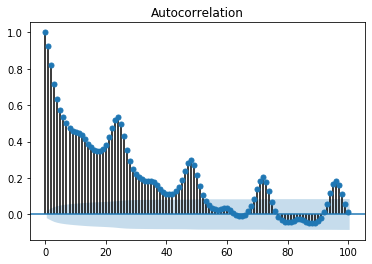

In [140]:
plot_acf(df['NOx'], alpha=.05, lags = 100)

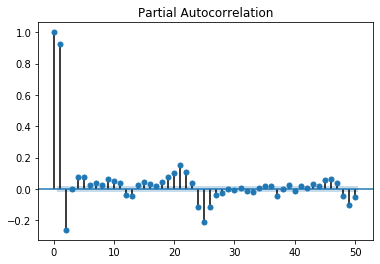

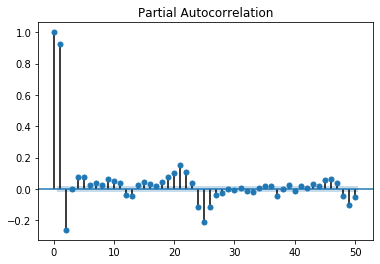

In [141]:
plot_pacf(df['NOx'], alpha=.05, lags = 50)

# Model Data

Perform Train Test Split

train_series = 
test_series = 

Calculate Persistance RMSE

In [51]:
predictions = df['NOx'].values[0:-1]
actuals = df['NOx'].values[1:]
print('RMSE:', mean_squared_error(actuals, predictions))

RMSE: 15220.766994442069


Build SARIMA model

In [166]:
sarima = SARIMAX(df['NOx'], order = (1,0,1), seasonal_order = (1,0,1,24))
sarima_model = sarima.fit()
print(sarima_model.summary())
print(sarima_model.params)

                                     SARIMAX Results                                      
Dep. Variable:                                NOx   No. Observations:                 9357
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 24)   Log Likelihood              -56634.881
Date:                            Thu, 22 Oct 2020   AIC                         113279.762
Time:                                    21:52:37   BIC                         113315.481
Sample:                                         0   HQIC                        113291.893
                                           - 9357                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9272      0.003    363.210      0.000       0.922       0.932
ma.L1          0.0598      0.006   

Build Facebook Prophet Model

In [169]:
fb_df = df
fb_df.columns = ['ds','y']
prophet = Prophet(interval_width=0.95)
prophet.fit(fb_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


NameError: name 'forecast' is not defined

In [ ]:
fb_model.make_future_dataframe(periods=(len(fb_valid)), freq='H')